# Introduction
Consider distances measured each year. Each measurement will have a certain amount of error in it.
This error ($\Delta y$) is the discrepancy between the measured value, and the value of $y$ given by the straight-line formula $y=mx+b$:    
$y_{i}+\Delta y=a+bx_{i}$  

When discussing least squares, this difference is more commonly referred to as the **residual**, and denoted by the letter $v$:  
$y_{i}+v_{i}=a+bx_{i}$  

The aim is to make these residuals as small as possible by finding the values of $a$ and $b$ that achieve this.

Formally: the sum of the squares of the residuals must be a minimum:  

$\sum{v^2_{i}}\Rightarrow min$

Thus, $\hat{a}+\hat{b}x_{i}=y_{i}+\hat{v_{i}}$, where the 'hats' denote the *least-squares estimates* of the parameters $a,b$ and the residuals $v$.  

We can calculate these values by expressing our known data in matrix form:

### General form ###
$Ax=b+v$  

### Matrix form ###
\begin{align}
\begin{bmatrix}
    1& x_1\\\
    1& x_2\\\
    \vdots& \vdots\\\
    1& x_m
\end{bmatrix}
\begin{bmatrix}
    a\\\
    b
\end{bmatrix}
=
\begin{bmatrix}
    y_1\\\
    y_2\\\
    \vdots\\\
    y_m
\end{bmatrix}
\begin{bmatrix}
    v_1\\\
    v_2\\\
    \vdots\\\
    v_m
\end{bmatrix}
\end{align}  

### Applied to the data ###
$a+bY = D$, where $Y$ is the year, and $D$ is the measured distance.  
$a+1996b = 13298.393$  
Etc. 

\begin{align}
    \begin{bmatrix}
        1& 1996\\\
        1& 1997\\\
        1& 1998\\\
        \vdots& \vdots
    \end{bmatrix}
    \begin{bmatrix}
        a\\\
        b
    \end{bmatrix}
    =
    \begin{bmatrix}
        13289.393\\\
        13298.506\\\
        13298.536\\\
        \vdots
    \end{bmatrix}
    \begin{bmatrix}
        v_1\\\
        v_2\\\
        v_3\\\
        \vdots
    \end{bmatrix}\
    &\updownarrow \text{10 rows, one for each year / distance measurement}\\
\end{align}  

The four matrices above represent $A, x, b$, and $v$, respectively.  
$x$ is the vector whose values for $a$ and $b$ (in this case) are to be found.  
Note the slope constant (1) in the $A$ matrix. If we were manually multiplying the matrices, we would have to include this, but `patsy` assumes we wish to include it, so there's no need.

---
### The solution ### 
$A^TAx=A^Tb$  
$x=(A^TA)^{-1}A^Tb$ (the inverse of $A$ transpose x $A$, multiplied by $A$ transpose x $b$.  
The result, $x$, is a column vector containing values for $a,b$

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import summary_table
%matplotlib inline

In [16]:
from matplotlib import rc
mpl.rcParams['figure.dpi'] = 300
rc('font', **{'family':'sans-serif',
    'sans-serif':['Helvetica'],
    'monospace': ['Inconsolata'],
    'serif': ['Helvetica']})
rc('text', **{'usetex': True})
rc('text', **{'latex.preamble': '\\usepackage{sfmath}'})

In [4]:
year_distance = pd.read_csv("../data/year_distance.csv")
year_distance

,index,Year,Distance
0,0,1996,13298.393
1,1,1997,13298.506
2,2,1998,13298.536
3,3,1999,13298.620
4,4,2000,13298.657
5,5,2001,13298.702
6,6,2002,13298.745
7,7,2003,13298.828
8,8,2004,13298.872
9,9,2005,13298.916


In [7]:
# We don't need to add a slope constant to the design matrix (A) if we're using patsy-style formulas.
fit = sm.ols(
     formula='Distance ~ Year',
     data=year_distance).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     682.9
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           4.94e-09
Time:                        14:58:47   Log-Likelihood:                 26.417
No. Observations:                  10   AIC:                            -48.83
Df Residuals:                       8   BIC:                            -48.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.319e+04      4.245   3106.868      0.000    1.32e+04    1.32e+04
Year           0.0554      0.002     26.132      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.524   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.265
Skew:                          -0.343   Prob(JB):                        0.876
Kurtosis:                       2.593   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
fit.params

Intercept    13187.752806
Year             0.055448
dtype: float64

**Parameters:**  
$a=13187.709$  
$b=0.0555$

These are the residuals, which we could manually add to our measured values to obtain the line of best fit

In [9]:
fit.resid

0   -0.034982
1    0.022570
2   -0.002879
3    0.025673
4    0.007224
5   -0.003224
6   -0.015673
7    0.011879
8    0.000430
9   -0.011018
dtype: float64

In [10]:
# OLS confidence intervals
st, data, ss2 = summary_table(fit, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

<Figure size 1800x1200 with 0 Axes>

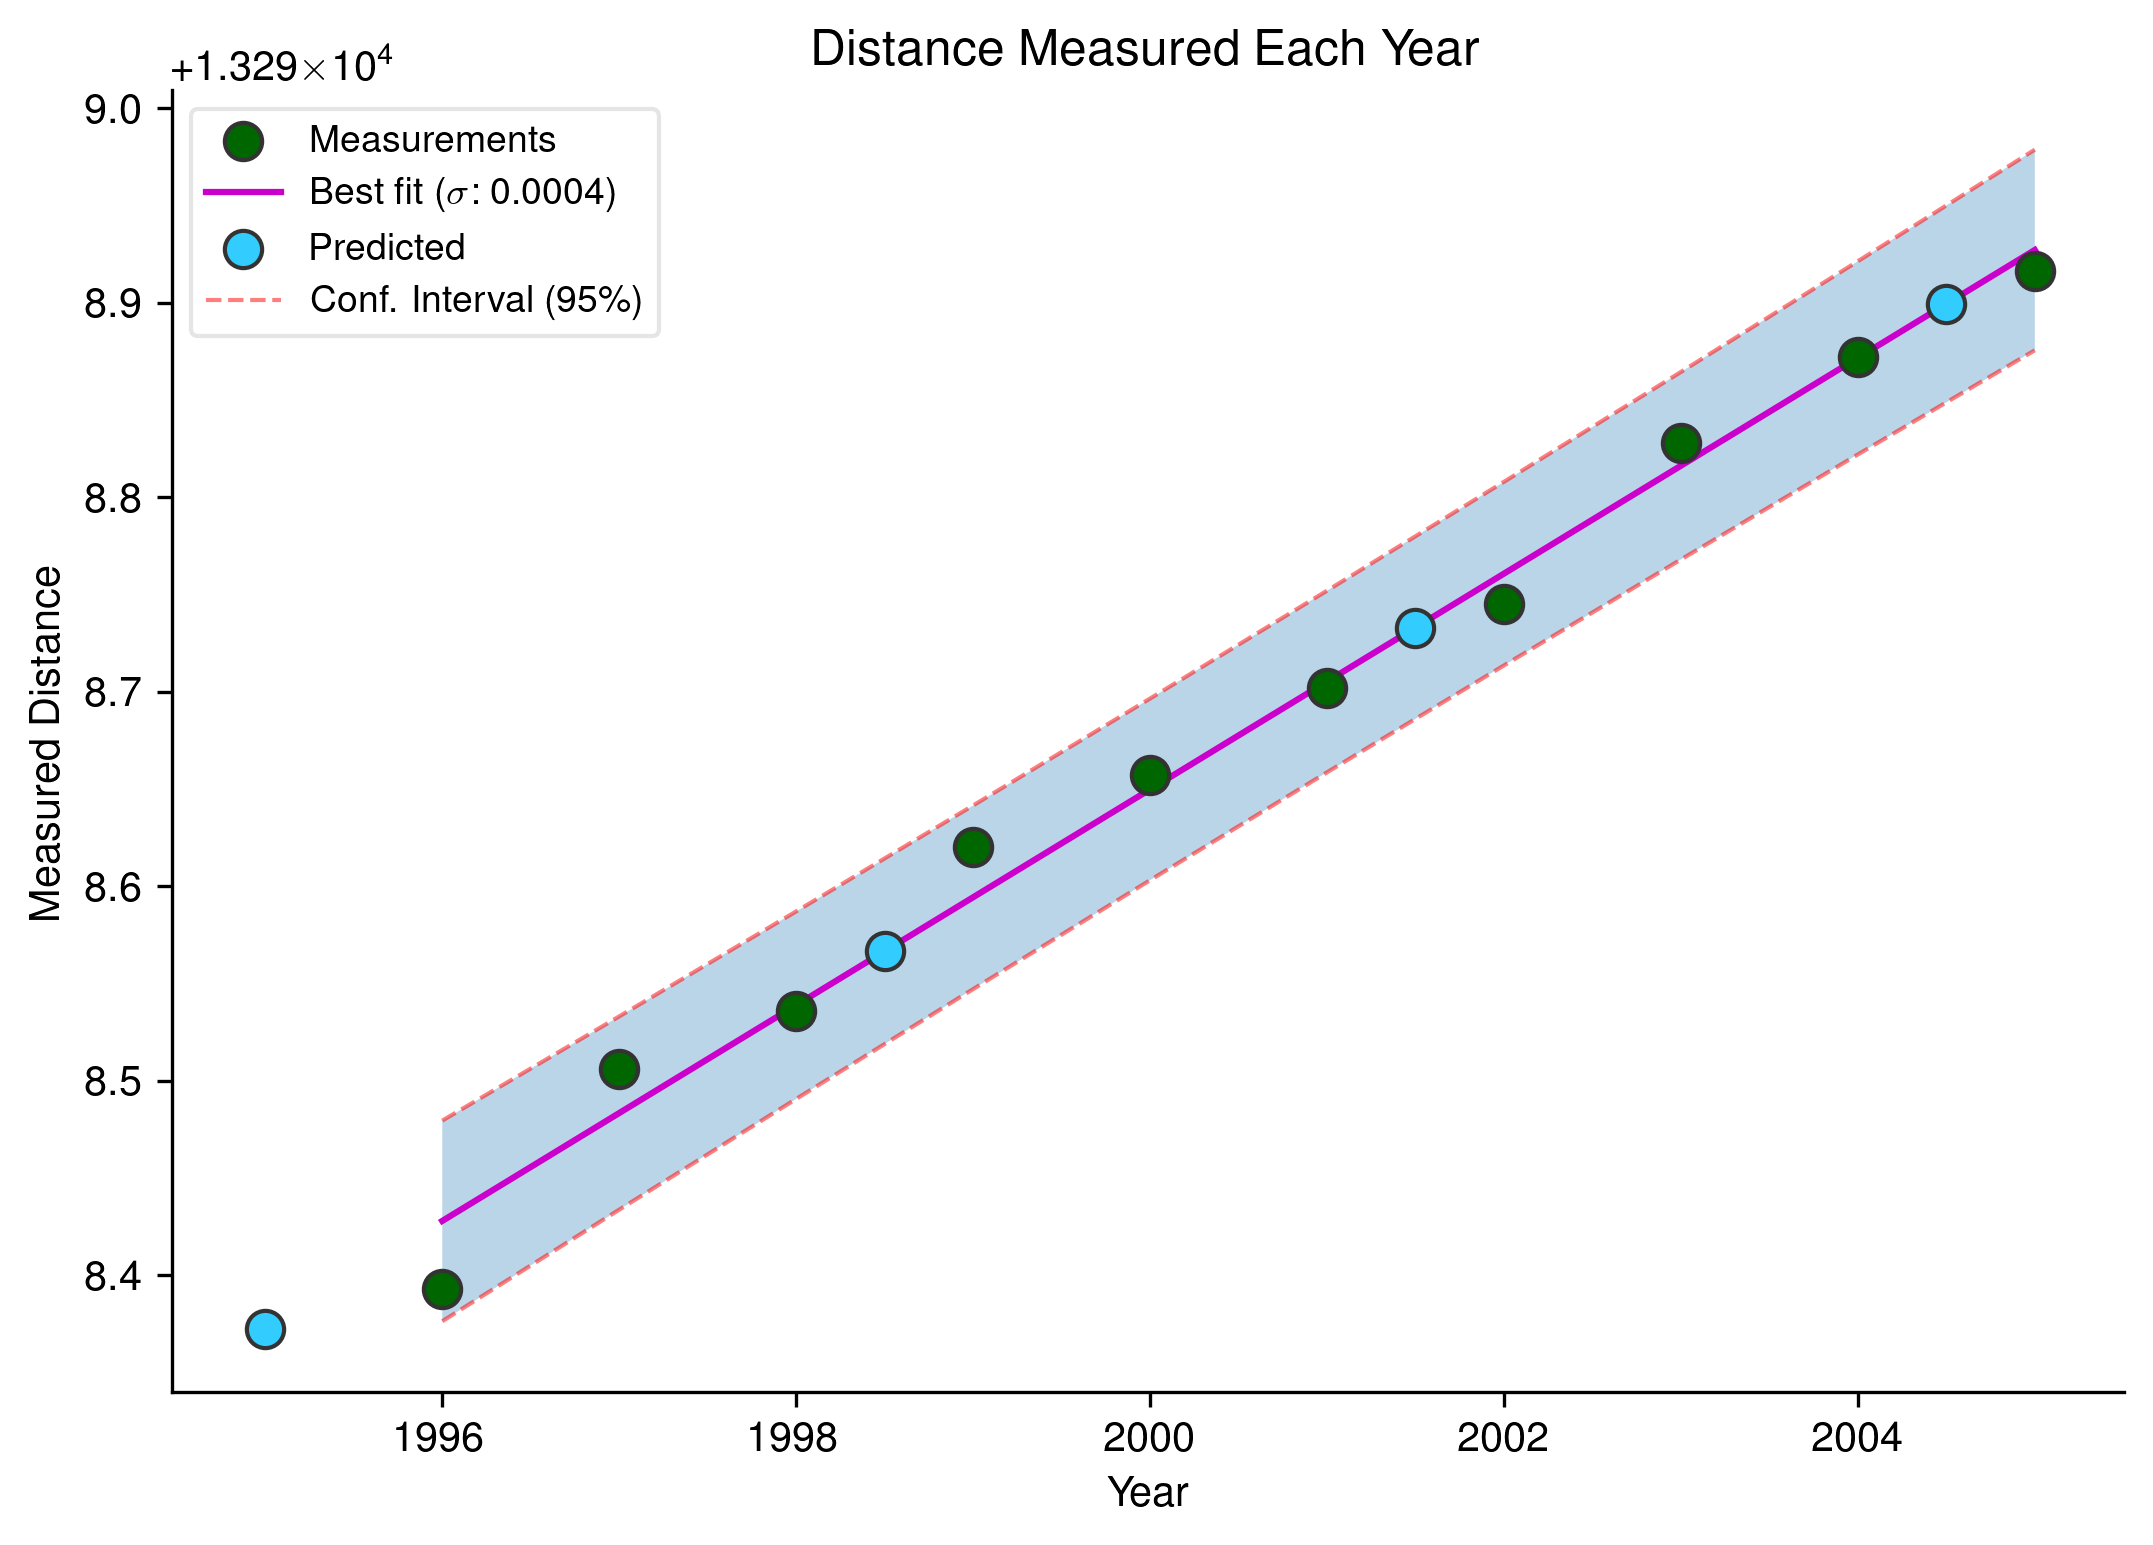

In [17]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='none')
# this will save as 728px (max width for a Github README) when dpi is set to 100
fig.set_size_inches(7.28, 5.25)

# Original measured values
orig = plt.scatter(
    year_distance['Year'],
    year_distance['Distance'],
    color='#006600',
    edgecolor='#333333',
    marker='o',
    s=80,
    lw=1,
    zorder=2,
    alpha=1.)
# we need the comma here: http://stackoverflow.com/questions/11983024/matplotlib-legends-not-working
# Line of best fit
fitted, = plt.plot(
    year_distance['Year'],
    fit.predict(),
    color='#CC00CC',
    zorder=1)
ax.set_xlabel('Year')
ax.set_ylabel('Measured Distance')
# let's predict some data
years = [1995, 1998.5, 2001.5, 2004.5]
predicted = fit.predict(
    pd.DataFrame({
        'Intercept': np.ones(len(years)),
        'Year': years}))
pred = plt.scatter(
    years,
    predicted,
    color='#33CCFF',
    edgecolor='#333333',
    marker='o',
    s=80,
    lw=1,
    alpha=1.0,
    zorder=2)

cil, = plt.plot(year_distance['Year'], predict_ci_low, 'r--', lw=1, alpha=0.5)
ciu, = plt.plot(year_distance['Year'], predict_ci_upp, 'r--', lw=1, alpha=0.5)
# mcil, = plt.plot(year_distance['Year'], predict_mean_ci_low, 'b--', lw=1, alpha=0.5)
# mciu, = plt.plot(year_distance['Year'], predict_mean_ci_upp, 'b--', lw=1, alpha=0.5)

ax.fill_between(year_distance['Year'], predict_ci_low, predict_ci_upp, alpha=0.3)

leg = plt.legend(
    (orig, fitted, pred, ciu),
    ('Measurements', r'Best fit ($\sigma$:~%0.4f)' % fit.mse_resid, 'Predicted', 'Conf. Interval (95\%)'),
    loc='upper left',
    scatterpoints=1,
    fontsize=9)

plt.title('Distance Measured Each Year')
leg.get_frame().set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.savefig('../OLS.png', format="png", bbox_inches='tight', alpha=True, transparent=True, dpi=300)